In [115]:
import numpy as np
import pandas as pd
import string
import re
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


In [116]:
true= pd.read_csv('data/True.csv')
fake= pd.read_csv('data/Fake.csv')


In [117]:
#Cleaning Data

true.drop_duplicates(inplace=True)
fake.drop_duplicates(inplace=True)

t_count=[]
for n in true['text']:
    t_count.append(len(n.split()))

true['count']= t_count
true= true[true['count'] > 500]


f_count=[]
for n in fake['text']:
    f_count.append(len(n.split()))

fake['count']= f_count
fake= fake[fake['count'] > 500]

  #Dropping columns

true= true.drop(columns=['title', 'subject', 'date', 'count'])
fake= fake.drop(columns=['title', 'subject', 'date', 'count'])

#Adding 'isfake'

true['isfake']= 0
fake['isfake']= 1

#Combining df

data= pd.concat([true, fake], axis=0, ignore_index=True)
data= data.reset_index()


In [118]:
print(data.shape)


(11759, 3)


In [149]:
true.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5719 entries, 0 to 21409
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5719 non-null   object
 1   isfake  5719 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 134.0+ KB


In [127]:
def count_words(text):
    return len(text.split())

# Calculate the word count for each text entry
print(np.mean(true['text'].apply(count_words)))
print(np.mean(fake['text'].apply(count_words)))


743.9938800489596
832.3450331125828


In [136]:
from spicy import stats
import seaborn as sns


In [135]:
print(stats.mode(true['text'].apply(count_words)))
print(stats.mode(fake['text'].apply(count_words)))


ModeResult(mode=505, count=31)
ModeResult(mode=510, count=37)


<Axes: ylabel='Count'>

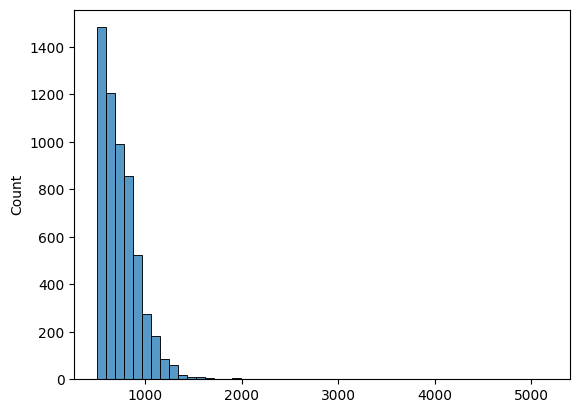

In [137]:
t_text_len= [len(texts.split()) for texts in true['text']]
f_text_len= [len(texts.split()) for texts in fake['text']]
sns.histplot(t_text_len, bins=50)


<Axes: ylabel='Count'>

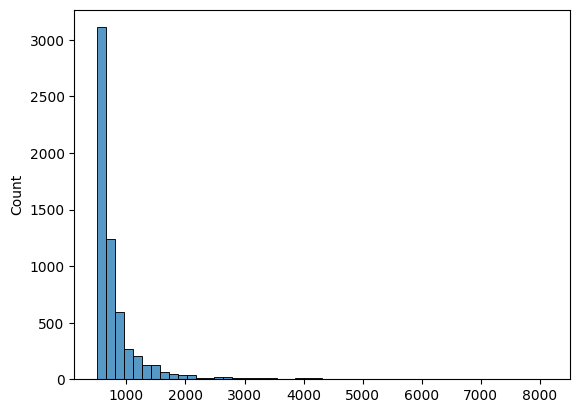

In [138]:
sns.histplot(f_text_len, bins=50)


In [119]:
data.text[8456]


'Bill Clinton was falsely confident in his plan to end North Korea s nuclear threat with diplomacy. Over 20 years later, his efforts, along with those of every president succeeding him, have been futile.Every president since Clinton has allowed North Korea s nuclear ambitions to go unchecked. Perhaps now that North Korea allegedly has the capability of striking our mainland, America really needs is a president who is willing to stand up to North Korea s brutal dictator and let him know he s not playing with Barack Obama anymore.Will President Trump be the one to finally put an end to North Korea s threatening rhetoric by refusing to ignore Kim Jong Un s threats?North Korea now has an intercontinental ballistic missile that can range most of the continental U.S., and a new Defense Intelligence Agency assessment suggests that North Korea has successfully miniaturized nuclear warheads for its missiles.In the early 1990s, Clinton faced a growing nuclear threat from North Korea, but he ulti

## Query Preprocessing

In [120]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [121]:
def cleaning(query):

    pattern = r'(?:[A-Z]+(?:[ \/][A-Z]+)* )?\(Reuters\) - '
    query= re.sub(pattern, '', query)

    query = query.strip()
    query = query.lower()
    query = ''.join(char for char in query if not char.isdigit())

    for punctuation in string.punctuation:
        query = query.replace(punctuation, '')


    tokenized_query = word_tokenize(query)
    stop_words = set(stopwords.words('english'))

    tokenized_query_cleaned = [
        w for w in tokenized_query if not w in stop_words
    ]

    lemmatized = [
        WordNetLemmatizer().lemmatize(word, pos = "v")
        for word in tokenized_query_cleaned
    ]

    cleaned_query= ' '.join(word for word in lemmatized)

    return cleaned_query


In [122]:
data['text']= data['text'].apply(cleaning)


In [123]:
data.text[8456]


'bill clinton falsely confident plan end north korea nuclear threat diplomacy years later efforts along every president succeed futileevery president since clinton allow north korea nuclear ambition go unchecked perhaps north korea allegedly capability strike mainland america really need president will stand north korea brutal dictator let know play barack obama anymorewill president trump one finally put end north korea threaten rhetoric refuse ignore kim jong un threatsnorth korea intercontinental ballistic missile range continental us new defense intelligence agency assessment suggest north korea successfully miniaturize nuclear warheads missilesin early clinton face grow nuclear threat north korea ultimately choose diplomacy deal application military force determine prevent north korea develop nuclear arsenal even risk war clinton write memoirs decide change course receive sober estimate stagger losses side would suffer war break watch clinton brag great success north koreankorea f

In [124]:
data.text[55]


'us congress allow deadline reimpose sanction iran pass week congressional white house aid say tuesday leave pact world power tehran intact least temporarily october trump decline certify iran comply nuclear agreement reach among tehran unite state others decision trigger day window congress decide whether bring back sanction iran congressional leaders announce plan introduce resolution reimpose sanction wednesday ’ deadline aid say lawmakers let deadline pass without action congress pass ball back trump must decide midjanuary want continue waive energy sanction iran trump ’ failure would blow apart deal course oppose european ally russia china party accord iran get sanction relief return curb nuclear ambition iran say nuclear program peaceful purpose deny aim build atomic bomb say stick accord long signatories respect “ shred ” deal washington pull white house spokeswoman sarah sanders say administration ask sanction reimpose “ administration continue make encourage progress congress 

In [125]:
data.to_csv('data/data.csv', index=False)


## 2nd Dataset

In [164]:
d_set= pd.read_csv('data/WELFake_Dataset.csv')


In [140]:
d_set


,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [165]:
d_set= d_set.rename(columns={'label':'isfake'})


In [166]:
d_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   isfake      72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [168]:
d_set['text']= d_set['text'].astype('str')


In [175]:

d_set.drop_duplicates(inplace=True)

d_count=[]
for n in d_set['text']:
    d_count.append(len(n.split()))

d_set['count']= d_count
d_set=  d_set[d_set['count'] > 500]



#Dropping columns

d_set= d_set.drop(columns=['Unnamed: 0', 'title', 'count'])


In [296]:
d_set['text']= d_set['text'].apply(cleaning)


In [ ]:
d_set.to_csv('data/data_2.csv', index=False)


In [200]:
d_set['isfake'].value_counts()


isfake
0    15058
1    11583
Name: count, dtype: int64

In [258]:
d_set.drop_duplicates(inplace=True)


In [262]:
d_set['isfake'].value_counts()


isfake
0    14963
1     8811
Name: count, dtype: int64

In [183]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11759 entries, 0 to 11758
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   11759 non-null  int64 
 1   text    11759 non-null  object
 2   isfake  11759 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 275.7+ KB


In [263]:
data_new= pd.concat([d_set, data], axis=0, ignore_index=True)


In [265]:
data_new['isfake'].value_counts()


isfake
0    20682
1    14851
Name: count, dtype: int64

In [266]:
data_new.drop(columns=['index'], inplace=True)
data_new.drop_duplicates(inplace=True)


In [267]:
data_new.shape


(23774, 2)

In [268]:
data_new['isfake'].value_counts()


isfake
0    14963
1     8811
Name: count, dtype: int64

In [287]:
df= data_new.copy()


In [288]:
df['isfake'].value_counts()


isfake
0    14963
1     8811
Name: count, dtype: int64

In [291]:
d_count=[]
for n in df['text']:
    d_count.append(len(n.split()))

df['count']= d_count
df=  df[df['count'] < 600]


In [292]:
df['isfake'].value_counts()


isfake
0    8611
1    6078
Name: count, dtype: int64

In [282]:
data['isfake'].value_counts()


isfake
1    6040
0    5719
Name: count, dtype: int64

In [293]:
d_set.info()


<class 'pandas.core.frame.DataFrame'>
Index: 23774 entries, 0 to 72132
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    23774 non-null  object
 1   isfake  23774 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 557.2+ KB


In [294]:
d_set['isfake'].value_counts()


isfake
0    14963
1     8811
Name: count, dtype: int64

In [295]:
d_set.to_csv('data/data_2.csv', index=False)


## Pipeline Contruction

In [126]:
pipeline= make_pipeline()
